### 1. Load History OHCLV 

create a new terminal and 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [41]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('./')

file_path = '/usr/local/services/freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
print(len(coins))

393


### 2. Pair Filter

In [42]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

target_coins = top200
# print(target_coins)

### 3. Load History OHLCV 

In [43]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)
print(len(coins))

139


### 3. History Data Transform

In [44]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)

### 4. OHLCV Filter

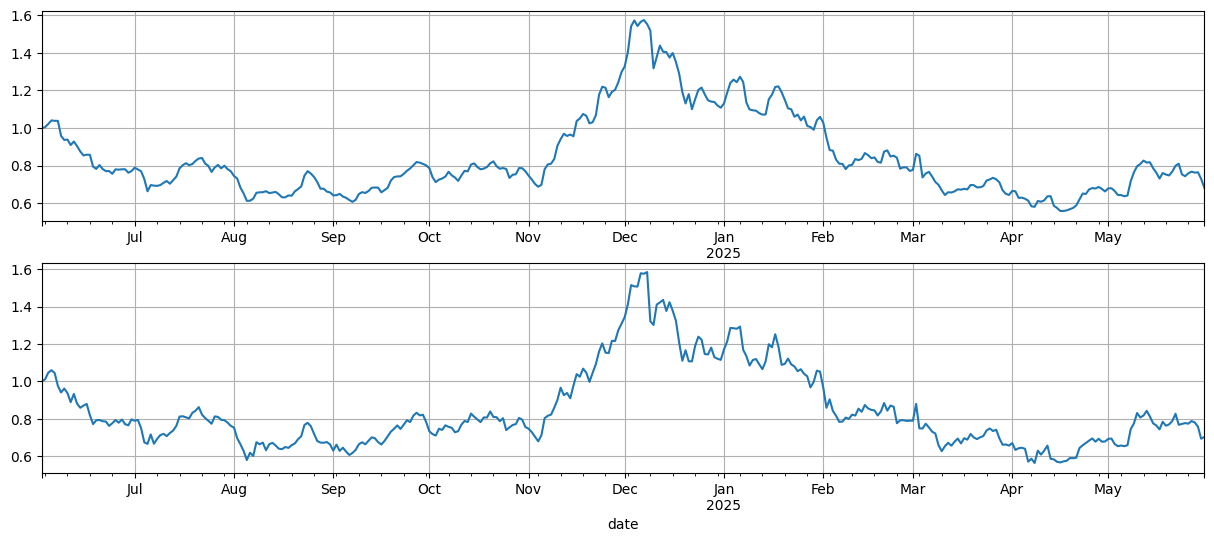

In [45]:
start_time = '2024-06-01'
end_time = '2025-06-01'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]

import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor

In [46]:
# Factor in WorldQuant 101
import Alpha101 as alpha101

df_data = {
    'open' : open_filter,
    'close' : close_filter,
    'high' : high_filter,
    'low' : low_filter,
    'volume' : volume_filter, 
}

alpha_all_in_one = alpha101.Alphas101(df_data)
alpha_list = [f"alpha{num:03d}" for num in range(1, 102)]

### 6. Data transfrom and process

In [47]:
import alphalens.utils as utils
import alphalens.tears as tears
import alphalens.performance as perf
import alphalens.plotting as plot
import numpy as np

IC_tables = []
SP_tables = []


for alpha_name in alpha_list:
    try:
        method = getattr(alpha_all_in_one, alpha_name)
        single_alpha = method() 
        factor = single_alpha.stack()
        factor.index.names = ['date', 'asset']
        factor = factor.dropna()  # 清理缺失值
        price = close_filter
    
        factor_data = utils.get_clean_factor_and_forward_returns(
            factor=factor,
            prices=price,
            periods=(1,),  
            quantiles = 10
        )
        
        IC = perf.factor_information_coefficient(factor_data)
        IC_table = plot.plot_information_table(IC,return_df=True)
        IC_table['AlphaName'] = alpha_name
        IC_tables.append(IC_table)
        print(f'{alpha_name} done \n {IC_table}')



        mean_return_by_q, _ = perf.mean_return_by_quantile(
            factor_data,
            by_date=True, 
            demeaned=False,
            group_adjust=False
        )
        top_quantile_daily = mean_return_by_q.loc[10]  # 最高分组每日收益
        bottom_quantile_daily = mean_return_by_q.loc[1]  # 最低分组每日收益
        long_short_daily = top_quantile_daily - bottom_quantile_daily # 计算 Long-Short 组合（最高减最低）
        long_short_cumulative = perf.cumulative_returns(long_short_daily)
        mean_return = long_short_daily.mean()
        std_dev = long_short_daily.std()
        sharpe_ratio = (mean_return) / std_dev * np.sqrt(365)
        SP_table = pd.DataFrame([{
                    "AlphaName":alpha_name,
                    "SP":float(sharpe_ratio),
                    "Pro Daily Mean":float(mean_return),
                    "Pro Total":float(long_short_cumulative.iloc[-1])
                }])
        print(f'{alpha_name} done \n {SP_table}')
        SP_tables.append(SP_table)

       
        
        
    except:
        print(f'{alpha_name} error continue')
    

if len(IC_tables) > 0 :
    IC_df = pd.concat(IC_tables)
    IC_df.to_csv('ALPHA101_IC_tables_top200.csv')

if len(SP_tables) > 0 :
    SP_df = pd.concat(SP_tables)
    SP_df.to_csv('ALPHA101_SP_tables_top200.csv')

Dropped 100.0% entries from factor data: 0.3% in forward returns computation and 99.7% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
alpha001 error continue
Dropped 14.4% entries from factor data: 13.0% in forward returns computation and 1.4% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
alpha002 done 
      IC Mean   IC Std.  Risk-Adjusted IC  t-stat(IC)  p-value(IC)   IC Skew  \
1D  0.016144  0.101965          0.158327    2.987304      0.00301  0.045044   

    IC Kurtosis AlphaName  
1D    -0.137771  alpha002  
alpha002 done 
   AlphaName        SP  Pro Daily Mean  Pro Total
0  alpha002  0.809569        0.000696   1.221214
Dropped 46.6% entries from factor data: 13.0% in forward returns computation and 33.6% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
alpha003 error continue
Dropped 100.0% entries from factor data: 0.3% in forward returns computation and 9

In [49]:
import pandas as pd
SP = pd.read_csv('ALPHA101_SP_tables_top200.csv')
IC = pd.read_csv('ALPHA101_IC_tables_top200.csv')
all = pd.merge(SP,IC,on=['AlphaName'])


# # 筛选表现好的因子
good_factors = all.sort_values(by=["SP","Pro Total"], ascending=False)  
good_factors = good_factors[['AlphaName','SP','Pro Daily Mean','Pro Total','IC Mean','IC Std.','t-stat(IC)']]
# print("表现好的因子：")
# print(good_factors[["AlphaName", "IC Mean", "Risk-Adjusted IC", "t-stat(IC)", "p-value(IC)"]])
good_factors

,AlphaName,SP,Pro Daily Mean,Pro Total,IC Mean,IC Std.,t-stat(IC)
22,alpha032,7.335139,0.011141,45.402683,0.081665,0.187585,8.225693
28,alpha039,2.746531,0.002646,1.323093,0.018504,0.151378,1.299392
12,alpha019,2.353346,0.002874,1.342217,0.016728,0.167634,1.060787
21,alpha031,2.124712,0.002436,2.133716,0.013200,0.127956,1.913280
18,alpha028,1.921874,0.002226,2.053254,0.002092,0.130029,0.306566
20,alpha030,1.617492,0.001921,1.771902,0.018093,0.130937,2.562906
10,alpha017,1.548273,0.001845,1.713460,0.030224,0.137901,4.041307
16,alpha025,1.464586,0.001705,1.651034,0.023796,0.133522,3.305411
7,alpha012,1.413864,0.001475,1.584937,0.013256,0.112235,2.247133
44,alpha072,1.341202,0.001501,1.538757,0.015767,0.119527,2.428690
